# Main analysis of data
## This notebook is intended to be a structured results collection from tools developed locally
### more infoo



---


## Statistics
### Envelope enhancer
#### In this section, FFT is performed and analyzed on regions of interest for each record.
Regions of interest is determined by the envelope of the signal. 

Pipeline:
1. Detrending
2. Savgol filter
3. Segmentation (Envelope enhancer)
4. FFT

Statistical values considered:
- The mean, variance and std. error of every freqcuency corresponding to a max value in its window.

### Imports

In [1]:
from ski_analys import DataRecord, simple_segmentation, envelope_enhancer, savgol_helper, enhanced_fft
import pathlib
import os
import matplotlib.pyplot as plt
import numpy as np

def load_data(filter_params, file):
    data = DataRecord(file)
    for filter in filter_params:
        if filter not in data.metadata:
            return None     
        if data.metadata[filter] not in filter_params[filter]:
            return None
    return data

In [2]:
csv_data_path = pathlib.Path("data/")
result_path = pathlib.Path("testing/")
for file in csv_data_path.glob("*.csv"):
    enhanced_fft(file=file, save_path="testing/", enhance_method=envelope_enhancer, filter=None, window_length=20, polyorder=3, axis=0, n_out=50, width=(400, 1600), prominence =(None, 20), detrending=True)
print("Done!")

Done!


In [ ]:
result_path = pathlib.Path("testing/")
data = [DataRecord(file) for file in result_path.iterdir() if file.is_file()]
x_data = [x for x in data if x.metadata['coord'] == 'x']
y_data = [x for x in data if x.metadata['coord'] == 'y']
z_data = [x for x in data if x.metadata['coord'] == 'z']

In [ ]:
highest_freqs = []
for obj in x_data:
    freq, mag = zip(*obj.data[5:len(obj.data)//2])
    
    
    index = np.argmax(mag)
    highest_freqs.append(freq[index])

np.var(highest_freqs), np.mean(highest_freqs), np.std(highest_freqs)
highest_freqs

In [ ]:
freq, mag = zip(*x_data[0].data[:len(x_data[0].data)//2])
plt.xlim(0, 20)
plt.plot(freq, mag)
x_data[0].metadata

In [ ]:
sample = [x for x in data if x.metadata['record'] == "5" and x.metadata['coord'] == 'z' and x.metadata['accel'] == '2']
n = len(sample[0].data)
x,y = zip(*sample[8].data[0:n//2])

plt.xlim(0, 50)
plt.plot(x,y)
np.argmax(y)
x[np.argmax(y)]

### Analyze Hannas data
#### Filter based on:
- Records in range 1-9 
- Accelerometer Both

In [3]:
# filter
filter = {
    "record": ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10"], # skip record 0, it was a test run
    "accel": ["1","2"]
}

result_path = pathlib.Path("testing/")
records = {
    "x": [],
    "y": [],
    "z": []
}

# itterate through results files, filter and load
for file in result_path.iterdir():
    if file.is_file():
        data = load_data(filter, file)
        if data:
            records[data.coord].append(data)

x_freq_peaks = [record.freq_peak for record in records["x"]]
y_freq_peaks = [record.freq_peak for record in records["y"]]
z_freq_peaks = [record.freq_peak for record in records["z"]]

# results
np.mean(x_freq_peaks), np.mean(y_freq_peaks), np.mean(z_freq_peaks)


(np.float64(13.437019757086984),
 np.float64(39.22101542950132),
 np.float64(14.832274533073393))

244
244
139
146
314


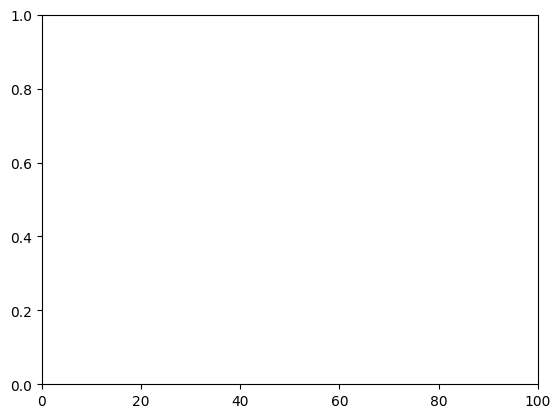

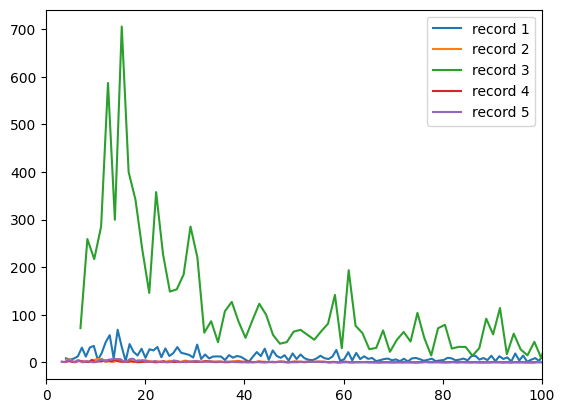

In [4]:
plt.xlim(0,100)
plt.figure()
for x in [1,2,3,4,5]:
    plt.plot(records["z"][x].freqs[5:], records["z"][x].mags[5:], label=f"record {x}")
    print(len(records["z"][x].mags[5:]))
    
plt.legend()
plt.xlim(0,100)
plt.show()


#### Hannas data by accel

In [10]:

x_freq_peaks_1 = [record.freq_peak for record in records["x"] if record.accel == "1"]
y_freq_peaks_1 = [record.freq_peak for record in records["y"] if record.accel == "1"]
z_freq_peaks_1 = [record.freq_peak for record in records["z"] if record.accel == "1"]

x_freq_peaks_2 = [record.freq_peak for record in records["x"] if record.accel == "2"]
y_freq_peaks_2 = [record.freq_peak for record in records["y"] if record.accel == "2"]
z_freq_peaks_2 = [record.freq_peak for record in records["z"] if record.accel == "2"]

# results

print(f"Accel 1:\n"
      f"mean x: {np.mean(x_freq_peaks_1)}, mean y: {np.mean(y_freq_peaks_1)}, mean z: {np.mean(z_freq_peaks_1)}\n"
      f"std x: {np.std(x_freq_peaks_1)}, std y: {np.std(y_freq_peaks_1)}, std z: {np.std(z_freq_peaks_1)}\n"
      f"var x: {np.var(x_freq_peaks_1)}, var y: {np.var(y_freq_peaks_1)}, var z: {np.var(z_freq_peaks_1)}\n")

print(f"Accel 2:\n"
      f"mean x: {np.mean(x_freq_peaks_2)}, mean y: {np.mean(y_freq_peaks_2)}, mean z: {np.mean(z_freq_peaks_2)}\n"
      f"std x: {np.std(x_freq_peaks_2)}, std y: {np.std(y_freq_peaks_2)}, std z: {np.std(z_freq_peaks_2)}\n"
      f"var x: {np.var(x_freq_peaks_2)}, var y: {np.var(y_freq_peaks_2)}, var z: {np.var(z_freq_peaks_2)}\n")



Accel 1:
mean x: 13.034755970150131, mean y: 18.479621260443558, mean z: 15.23094699575633
std x: 13.938063222824644, std y: 31.068034786074655, std z: 11.453231677976193
var x: 194.2696064034569, var y: 965.2227854687449, var z: 131.17651586939735

Accel 2:
mean x: 13.665706465409826, mean y: 62.075028472676124, mean z: 15.299896991664133
std x: 2.6999242730020048, std y: 8.598006065815126, std z: 2.4860893523345715
var x: 7.289591079945403, var y: 73.9257083077937, var z: 6.180640267791329



### Eriks data
filter based on:
- Records in range 11-19
- Accelerometer: Both

In [11]:
# filter
filter = {
    "record": ["11", "12", "13", "14", "15", "16", "17", "18", "19"], # skip record 0, it was a test run
    "accel": ["1","2"]
}

result_path = pathlib.Path("testing/")
records = {
    "x": [],
    "y": [],
    "z": []
}

for file in result_path.iterdir():
    if file.is_file():
        data = load_data(filter, file)
        if data:
            records[data.coord].append(data)

x_freq_peaks = [record.freq_peak for record in records["x"]]
y_freq_peaks = [record.freq_peak for record in records["y"]]
z_freq_peaks = [record.freq_peak for record in records["z"]]

np.mean(x_freq_peaks), np.mean(y_freq_peaks), np.mean(z_freq_peaks)

(np.float64(10.54577652163909),
 np.float64(33.51518596084816),
 np.float64(14.469273033270953))

In [12]:

x_freq_peaks_1 = [record.freq_peak for record in records["x"] if record.accel == "1"]
y_freq_peaks_1 = [record.freq_peak for record in records["y"] if record.accel == "1"]
z_freq_peaks_1 = [record.freq_peak for record in records["z"] if record.accel == "1"]

x_freq_peaks_2 = [record.freq_peak for record in records["x"] if record.accel == "2"]
y_freq_peaks_2 = [record.freq_peak for record in records["y"] if record.accel == "2"]
z_freq_peaks_2 = [record.freq_peak for record in records["z"] if record.accel == "2"]

# results

print(f"Accel 1:\n"
      f"mean x: {np.mean(x_freq_peaks_1)}, mean y: {np.mean(y_freq_peaks_1)}, mean z: {np.mean(z_freq_peaks_1)}\n"
      f"std x: {np.std(x_freq_peaks_1)}, std y: {np.std(y_freq_peaks_1)}, std z: {np.std(z_freq_peaks_1)}\n"
      f"var x: {np.var(x_freq_peaks_1)}, var y: {np.var(y_freq_peaks_1)}, var z: {np.var(z_freq_peaks_1)}\n")

print(f"Accel 2:\n"
      f"mean: x: {np.mean(x_freq_peaks_2)}, y: {np.mean(y_freq_peaks_2)}, z: {np.mean(z_freq_peaks_2)}\n"
      f"std: x: {np.std(x_freq_peaks_2)}, y: {np.std(y_freq_peaks_2)}, z: {np.std(z_freq_peaks_2)}\n"
      f"var: x: {np.var(x_freq_peaks_2)}, y: {np.var(y_freq_peaks_2)}, z: {np.var(z_freq_peaks_2)}\n")



Accel 1:
mean x: 7.575206544057445, mean y: 9.615192242561394, mean z: 13.872341933941112
std x: 7.4617262946819425, std y: 17.282758993262238, std z: 8.947665540190801
var x: 55.677359296747916, var y: 298.69375841918674, var z: 80.06071861911795

Accel 2:
mean: x: 13.439188837465366, y: 55.37493631293971, z: 15.095682211580048
std: x: 6.958819731923405, y: 21.452498695717093, z: 3.278993209594747
var: x: 48.42517206140652, y: 460.2097002897436, z: 10.751796468568463

